#Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D,Conv1DTranspose,Concatenate,Input
import numpy as np
import IPython.display
import glob
from tqdm.notebook import tqdm
import librosa.display
import matplotlib.pyplot as plt

#Extracting Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir "/content/dataset/"
!mkdir "/content/dataset/CleanData"
!mkdir "/content/dataset/NoisyData"


In [ ]:
!unzip "/content/drive/MyDrive/NoiseSupressionData/clean_trainset_wav.zip" -d "/content/dataset/CleanData"
!unzip "/content/drive/MyDrive/NoiseSupressionData/noisy_trainset_wav.zip" -d "/content/dataset/NoisyData"

#Load the Data

In [2]:
clean_sounds = glob.glob('/content/dataset/CleanData/*')
noisy_sounds = glob.glob('/content/dataset/NoisyData/*')

# Analysis

In [136]:
import librosa
import IPython.display as ipd

audio_data = clean_sounds[4]
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print("SAMPLE RATE:",sr)
ipd.Audio(audio_data)

<class 'numpy.ndarray'> <class 'int'>
SAMPLE RATE: 22050


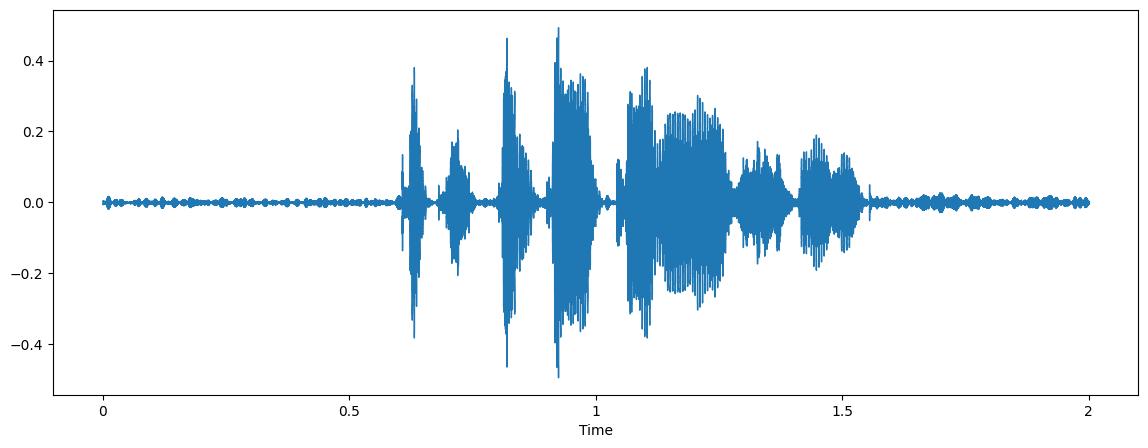

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [142]:
x , sr = librosa.load(audio_data, sr=44100)
sr

44100

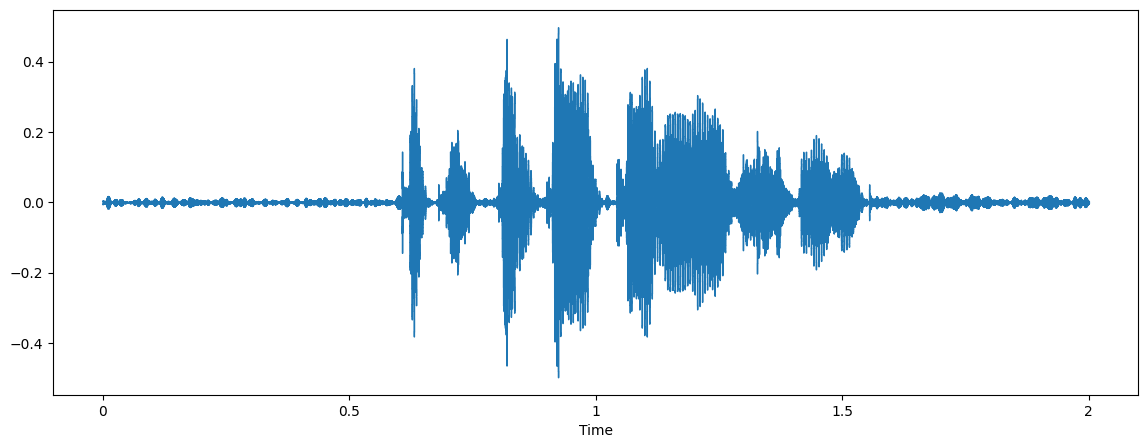

In [143]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

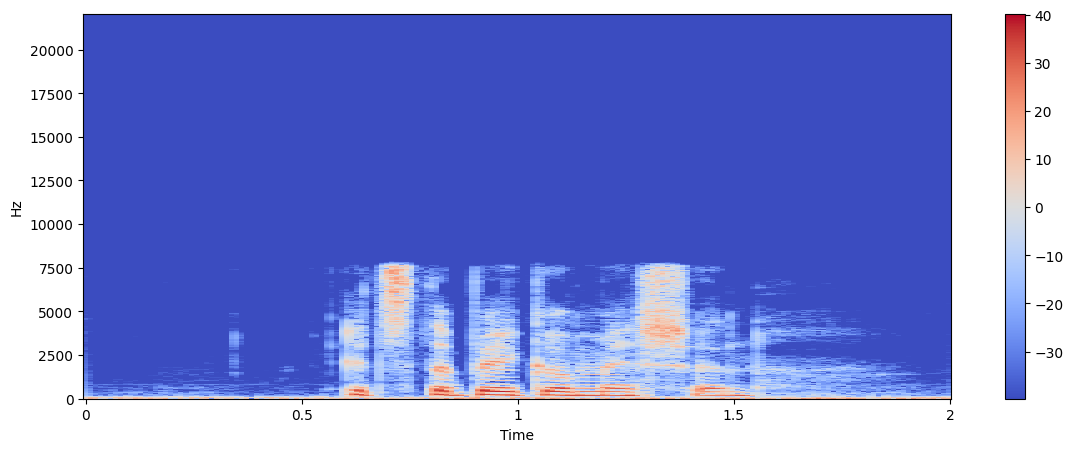

In [144]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

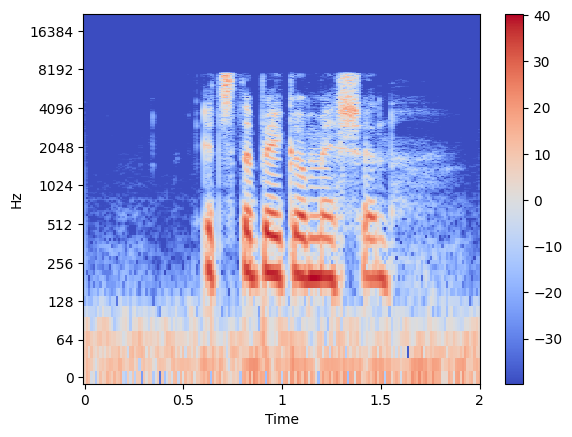

In [145]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()